# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [26]:
pwd

u'/vagrant/DSI_JY/DSI-projects/classes/week-03/1.4-lab/code/starter-code'

In [27]:
%matplotlib inline
import pandas as pd

filename = "../../assets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [28]:
data.sale_date = pd.to_datetime(data.sale_date)

In [29]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
% matplotlib inline

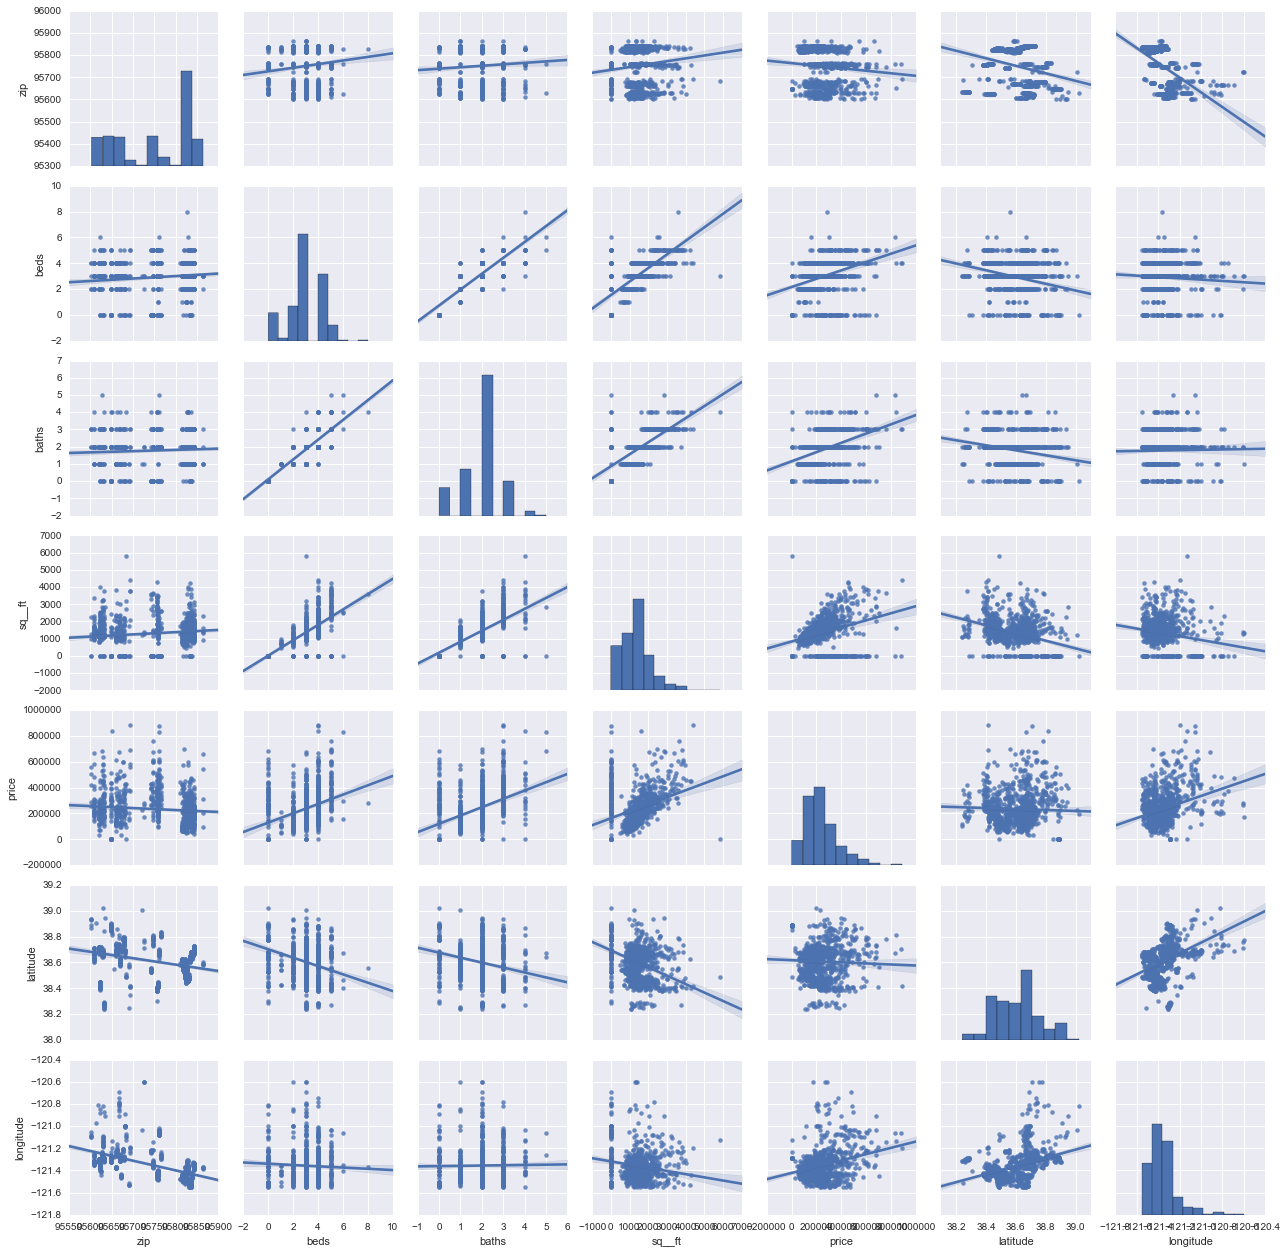

In [30]:
sns.pairplot(data, kind='reg')

In [31]:
data.sq__ft.describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [32]:
data['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [33]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null datetime64[ns]
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 92.4+ KB


In [35]:
data.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

In [40]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [46]:
df = data.reindex(columns=[u'zip', u'beds', u'baths', u'sq__ft',
        u'latitude', u'longitude'])

In [48]:
df.isnull().sum()

zip          0
beds         0
baths        0
sq__ft       0
latitude     0
longitude    0
dtype: int64

In [49]:
data.latitude.describe()

count    985.000000
mean      38.607732
std        0.145433
min       38.241514
25%       38.482717
50%       38.626582
75%       38.695589
max       39.020808
Name: latitude, dtype: float64

In [50]:
df.latitude.describe()

count    985.000000
mean      38.607732
std        0.145433
min       38.241514
25%       38.482717
50%       38.626582
75%       38.695589
max       39.020808
Name: latitude, dtype: float64

In [43]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


In [39]:
df.isnull().sum()

street       6
city         6
zip          6
state        6
beds         6
baths        6
sq__ft       6
type         6
sale_date    6
price        6
latitude     6
longitude    6
dtype: int64

In [41]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
baths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
sq__ft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

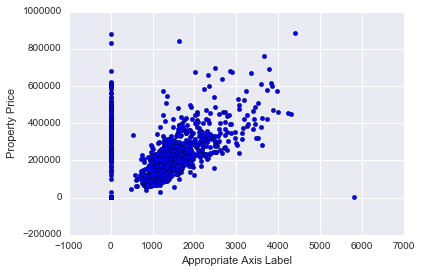

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

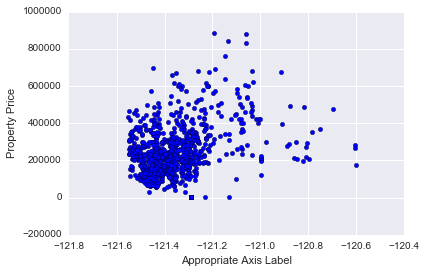

In [11]:
x = data['longitude']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

In [22]:
df = df[df.isnull()]

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

result = {}
y = data['price']
for col1 in df.columns :
    for col2 in df.columns :
        X = df[[col1, col2]]
        model = lm.fit(X, y)
        predictions = lm.predict(X)
        #print col1, " ", col2, " ", mean_squared_error(y, predictions)
        result[(col1,col2)] = mean_squared_error(y, predictions)
min(result, key=result.get)



## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [51]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()

result = {}
y = data['price']
for col1 in df.columns :
    for col2 in df.columns :
        for col3 in df.columns :
            X = df[[col1, col2, col3]]
            model = lm.fit(X, y)
            predictions = lm.predict(X)
            #print col1, " ", col2, " ", mean_squared_error(y, predictions)
            result[(col1,col2,col3)] = mean_squared_error(y, predictions)
min(result, key=result.get)

(u'baths', u'sq__ft', u'longitude')